### 사용할 모듈 import하기

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### 차트 내 한글 깨짐 방지

In [4]:
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

### 경고창 무시하기

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

### csv파일 불러오기

In [6]:
df = pd.read_csv('./mydata.csv', encoding = 'cp949')

### 데이터프레임의 기초 정보 확인하기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468922 entries, 0 to 468921
Data columns (total 44 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   개방자치단체코드   468922 non-null  int64  
 1   관리번호       468922 non-null  object 
 2   인허가일자      468922 non-null  int64  
 3   인허가취소일자    0 non-null       float64
 4   영업상태코드     468922 non-null  int64  
 5   영업상태명      468922 non-null  object 
 6   상세영업상태코드   468922 non-null  int64  
 7   상세영업상태명    468922 non-null  object 
 8   폐업일자       344722 non-null  float64
 9   휴업시작일자     0 non-null       float64
 10  휴업종료일자     0 non-null       float64
 11  재개업일자      0 non-null       float64
 12  전화번호       327769 non-null  object 
 13  소재지면적      434185 non-null  float64
 14  소재지우편번호    468677 non-null  float64
 15  지번주소       468685 non-null  object 
 16  도로명주소      217979 non-null  object 
 17  도로명우편번호    214449 non-null  float64
 18  사업장명       468921 non-null  object 
 19  최종수정일자     468922 non-n

### 데이터 전처리 작업하기
#### 1. 결측치 확인

In [8]:
df.isnull().sum()

개방자치단체코드          0
관리번호              0
인허가일자             0
인허가취소일자      468922
영업상태코드            0
영업상태명             0
상세영업상태코드          0
상세영업상태명           0
폐업일자         124200
휴업시작일자       468922
휴업종료일자       468922
재개업일자        468922
전화번호         141153
소재지면적         34737
소재지우편번호         245
지번주소            237
도로명주소        250943
도로명우편번호      254473
사업장명              1
최종수정일자            0
데이터갱신구분           0
데이터갱신일자           0
업태구분명            22
좌표정보(X)       24831
좌표정보(Y)       24831
위생업태명         60222
남성종사자수       205569
여성종사자수       203355
영업장주변구분명     226735
등급구분명        235572
급수시설구분명      180141
총인원          468922
본사종업원수       468824
공장사무직종업원수    468825
공장판매직종업원수    468825
공장생산직종업원수    468825
건물소유구분명      468921
보증액          468824
월세액          468824
다중이용업소여부      60206
시설총규모         60206
전통업소지정번호     467209
전통업소주된음식     468026
홈페이지         468922
dtype: int64

#### 2. 필요한 부분만 가져오기

#### 1) 폐업한 상점 데이터 가지고 오기, 필요없는 컬럼들 지우기

In [9]:
closed = df[df['상세영업상태명'] == '폐업']
closed = closed.drop(closed.columns[0:7], axis = 1)
closed = closed.drop(closed.columns[25:43], axis = 1)
closed.info()
# 지번주소 non-null한 데이터 수: 344524개, 도로명주소 non-null한 데이터 수: 95541개
## 지번주소에서 지역구를 추출하기 (데이터 수가 많으므로)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344728 entries, 18 to 468920
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상세영업상태명   344728 non-null  object 
 1   폐업일자      344722 non-null  float64
 2   휴업시작일자    0 non-null       float64
 3   휴업종료일자    0 non-null       float64
 4   재개업일자     0 non-null       float64
 5   전화번호      268752 non-null  object 
 6   소재지면적     316100 non-null  float64
 7   소재지우편번호   344573 non-null  float64
 8   지번주소      344580 non-null  object 
 9   도로명주소     95597 non-null   object 
 10  도로명우편번호   92856 non-null   float64
 11  사업장명      344728 non-null  object 
 12  최종수정일자    344728 non-null  int64  
 13  데이터갱신구분   344728 non-null  object 
 14  데이터갱신일자   344728 non-null  object 
 15  업태구분명     344718 non-null  object 
 16  좌표정보(X)   321499 non-null  float64
 17  좌표정보(Y)   321499 non-null  float64
 18  위생업태명     327913 non-null  object 
 19  남성종사자수    234639 non-null  float64
 20  여성종

In [10]:
closed.head()

,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,...,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총인원
18,폐업,20210430.0,NaN,NaN,NaN,NaN,14.70,137891.0,서울특별시 서초구 양재동 120-10 1층,서울특별시 서초구 양재천로11길 12 1층 (양재동),...,기타,203159.960000,441451.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,폐업,20200602.0,NaN,NaN,NaN,NaN,12.00,135829.0,서울특별시 강남구 논현동 226번지,서울특별시 강남구 봉은사로33길 34 지하1층 5-1호 (논현동),...,한식,203028.770828,445334.720543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,폐업,20200602.0,NaN,NaN,NaN,NaN,110.40,137875.0,서울특별시 서초구 서초동 1576-4번지 1층 101호,서울특별시 서초구 서초중앙로 103 1층 101호 (서초동),...,기타,201159.654678,443187.071173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,폐업,20210806.0,NaN,NaN,NaN,NaN,50.00,152854.0,서울특별시 구로구 구로동 429-43 1층,서울특별시 구로구 구로동로28길 51 1층 (구로동),...,중국식,189942.919736,443201.373933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,폐업,20200602.0,NaN,NaN,NaN,02 356 5380,36.98,122923.0,서울특별시 은평구 응암동 126-5번지 1층 102호,서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동),...,기타,192540.370555,454712.243026,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2) 상호별 상세 주소 가져오기

In [11]:
# 지번주소 컬럼에서 등록된 상호의 지역구 추출하기

closed = closed.dropna(subset = ['지번주소'])
# 지번주소 컬럼 내 결측치를 제거하기

def goo(x):
    if x[0] == "서":
        res = x.split(' ')[1]
        return res
    else:
        return None
# 지역구 추출하는 함수
## 데이터 내 '서울특별시 ~' 로 시작하는 주소가 없는 경우 Null처리하는 함수 정의

closed['지역(구)'] = closed['지번주소'].apply(goo)

closed['업태구분명'].isnull().sum()
# 데이터 내 업태구분명 컬럼에서도 결측치가 존재함

10

In [12]:
closed = closed.dropna(subset = ['업태구분명'])
closed['업태구분명'].isnull().sum()
# 업태구분명 컬럼의 결측치 모두 제거

0

In [13]:
closed = closed.dropna(subset = ['폐업일자'])
closed['폐업일자'].isnull().sum()
# 폐업일자 컬럼의 결측치가 제거됐는지 확인

0

In [14]:
closed
# 데이터프레임 작업 결과 확인

,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,...,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총인원,지역(구)
18,폐업,20210430.0,NaN,NaN,NaN,NaN,14.70,137891.0,서울특별시 서초구 양재동 120-10 1층,서울특별시 서초구 양재천로11길 12 1층 (양재동),...,203159.960000,441451.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서초구
50,폐업,20200602.0,NaN,NaN,NaN,NaN,12.00,135829.0,서울특별시 강남구 논현동 226번지,서울특별시 강남구 봉은사로33길 34 지하1층 5-1호 (논현동),...,203028.770828,445334.720543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구
52,폐업,20200602.0,NaN,NaN,NaN,NaN,110.40,137875.0,서울특별시 서초구 서초동 1576-4번지 1층 101호,서울특별시 서초구 서초중앙로 103 1층 101호 (서초동),...,201159.654678,443187.071173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서초구
58,폐업,20210806.0,NaN,NaN,NaN,NaN,50.00,152854.0,서울특별시 구로구 구로동 429-43 1층,서울특별시 구로구 구로동로28길 51 1층 (구로동),...,189942.919736,443201.373933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,구로구
60,폐업,20200602.0,NaN,NaN,NaN,02 356 5380,36.98,122923.0,서울특별시 은평구 응암동 126-5번지 1층 102호,서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동),...,192540.370555,454712.243026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,은평구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468906,폐업,20211005.0,NaN,NaN,NaN,0234462696,149.48,137904.0,서울특별시 서초구 잠원동 28-8 1층,서울특별시 서초구 강남대로 571 1층 (잠원동),...,201713.624058,445611.458964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서초구
468912,폐업,20211005.0,NaN,NaN,NaN,NaN,83.33,135928.0,서울특별시 강남구 역삼동 775-2 초원빌딩 1층 104호,서울특별시 강남구 논현로72길 16 (역삼동초원빌딩 1층 104호),...,203539.168707,443716.403617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구
468916,폐업,20211005.0,NaN,NaN,NaN,02 3540818,35.20,122881.0,서울특별시 은평구 신사동 19-161 1층,서울특별시 은평구 가좌로 328 1층 (신사동),...,191896.691065,454928.218389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,은평구
468918,폐업,20211005.0,NaN,NaN,NaN,0209197488,66.44,136893.0,서울특별시 성북구 정릉동 227-65,서울특별시 성북구 서경로 96 (정릉동),...,201144.184887,456583.708970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,성북구


In [15]:
closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344564 entries, 18 to 468920
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상세영업상태명   344564 non-null  object 
 1   폐업일자      344564 non-null  float64
 2   휴업시작일자    0 non-null       float64
 3   휴업종료일자    0 non-null       float64
 4   재개업일자     0 non-null       float64
 5   전화번호      268695 non-null  object 
 6   소재지면적     315942 non-null  float64
 7   소재지우편번호   344557 non-null  float64
 8   지번주소      344564 non-null  object 
 9   도로명주소     95440 non-null   object 
 10  도로명우편번호   92710 non-null   float64
 11  사업장명      344564 non-null  object 
 12  최종수정일자    344564 non-null  int64  
 13  데이터갱신구분   344564 non-null  object 
 14  데이터갱신일자   344564 non-null  object 
 15  업태구분명     344564 non-null  object 
 16  좌표정보(X)   321337 non-null  float64
 17  좌표정보(Y)   321337 non-null  float64
 18  위생업태명     327774 non-null  object 
 19  남성종사자수    234625 non-null  float64
 20  여성종

In [16]:
closed = closed.drop(closed.columns[18:25], axis = 1)
# 분석에 필요없는 컬럼들 다시 제거

In [17]:
closed.isnull().sum()
# 결측치가 없는지 재확인

상세영업상태명         0
폐업일자            0
휴업시작일자     344564
휴업종료일자     344564
재개업일자      344564
전화번호        75869
소재지면적       28622
소재지우편번호         7
지번주소            0
도로명주소      249124
도로명우편번호    251854
사업장명            0
최종수정일자          0
데이터갱신구분         0
데이터갱신일자         0
업태구분명           0
좌표정보(X)     23227
좌표정보(Y)     23227
지역(구)           0
dtype: int64

#### 3) 폐업일자가 2018.02.20 이후인 데이터만 추출하기

In [18]:
closed.head()

,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
18,폐업,20210430.0,NaN,NaN,NaN,NaN,14.70,137891.0,서울특별시 서초구 양재동 120-10 1층,서울특별시 서초구 양재천로11길 12 1층 (양재동),6754.0,커피할루카,20210430172324,U,2020-12-05 00:02:00.0,기타,203159.960000,441451.870000,서초구
50,폐업,20200602.0,NaN,NaN,NaN,NaN,12.00,135829.0,서울특별시 강남구 논현동 226번지,서울특별시 강남구 봉은사로33길 34 지하1층 5-1호 (논현동),6107.0,김경자 3代 진국,20200602105117,U,2019-12-06 00:04:00.0,한식,203028.770828,445334.720543,강남구
52,폐업,20200602.0,NaN,NaN,NaN,NaN,110.40,137875.0,서울특별시 서초구 서초동 1576-4번지 1층 101호,서울특별시 서초구 서초중앙로 103 1층 101호 (서초동),6650.0,미스터피자 교대점,20200602164648,U,2019-12-06 00:04:00.0,기타,201159.654678,443187.071173,서초구
58,폐업,20210806.0,NaN,NaN,NaN,NaN,50.00,152854.0,서울특별시 구로구 구로동 429-43 1층,서울특별시 구로구 구로동로28길 51 1층 (구로동),8307.0,투보가요리집,20210806110231,U,2020-12-08 00:08:00.0,중국식,189942.919736,443201.373933,구로구
60,폐업,20200602.0,NaN,NaN,NaN,02 356 5380,36.98,122923.0,서울특별시 은평구 응암동 126-5번지 1층 102호,서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동),3456.0,근린커피 브루잉,20200602151013,U,2019-12-06 00:04:00.0,기타,192540.370555,454712.243026,은평구


In [19]:
closed = closed[closed['폐업일자'] >= 20180220]
closed

,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,전화번호,소재지면적,소재지우편번호,지번주소,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
18,폐업,20210430.0,NaN,NaN,NaN,NaN,14.70,137891.0,서울특별시 서초구 양재동 120-10 1층,서울특별시 서초구 양재천로11길 12 1층 (양재동),6754.0,커피할루카,20210430172324,U,2020-12-05 00:02:00.0,기타,203159.960000,441451.870000,서초구
50,폐업,20200602.0,NaN,NaN,NaN,NaN,12.00,135829.0,서울특별시 강남구 논현동 226번지,서울특별시 강남구 봉은사로33길 34 지하1층 5-1호 (논현동),6107.0,김경자 3代 진국,20200602105117,U,2019-12-06 00:04:00.0,한식,203028.770828,445334.720543,강남구
52,폐업,20200602.0,NaN,NaN,NaN,NaN,110.40,137875.0,서울특별시 서초구 서초동 1576-4번지 1층 101호,서울특별시 서초구 서초중앙로 103 1층 101호 (서초동),6650.0,미스터피자 교대점,20200602164648,U,2019-12-06 00:04:00.0,기타,201159.654678,443187.071173,서초구
58,폐업,20210806.0,NaN,NaN,NaN,NaN,50.00,152854.0,서울특별시 구로구 구로동 429-43 1층,서울특별시 구로구 구로동로28길 51 1층 (구로동),8307.0,투보가요리집,20210806110231,U,2020-12-08 00:08:00.0,중국식,189942.919736,443201.373933,구로구
60,폐업,20200602.0,NaN,NaN,NaN,02 356 5380,36.98,122923.0,서울특별시 은평구 응암동 126-5번지 1층 102호,서울특별시 은평구 응암로21가길 9-11 1층 102호 (응암동),3456.0,근린커피 브루잉,20200602151013,U,2019-12-06 00:04:00.0,기타,192540.370555,454712.243026,은평구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468906,폐업,20211005.0,NaN,NaN,NaN,0234462696,149.48,137904.0,서울특별시 서초구 잠원동 28-8 1층,서울특별시 서초구 강남대로 571 1층 (잠원동),6530.0,미인감자탕,20211005151805,U,2020-10-31 00:07:00.0,한식,201713.624058,445611.458964,서초구
468912,폐업,20211005.0,NaN,NaN,NaN,NaN,83.33,135928.0,서울특별시 강남구 역삼동 775-2 초원빌딩 1층 104호,서울특별시 강남구 논현로72길 16 (역삼동초원빌딩 1층 104호),6227.0,만복회해산물,20211005120322,U,2020-10-31 00:07:00.0,한식,203539.168707,443716.403617,강남구
468916,폐업,20211005.0,NaN,NaN,NaN,02 3540818,35.20,122881.0,서울특별시 은평구 신사동 19-161 1층,서울특별시 은평구 가좌로 328 1층 (신사동),3437.0,술,20211005111931,U,2020-10-31 00:07:00.0,한식,191896.691065,454928.218389,은평구
468918,폐업,20211005.0,NaN,NaN,NaN,0209197488,66.44,136893.0,서울특별시 성북구 정릉동 227-65,서울특별시 성북구 서경로 96 (정릉동),2713.0,미진각,20211005115231,U,2020-10-31 00:07:00.0,중국식,201144.184887,456583.708970,성북구


In [20]:
print(pd.unique(closed['휴업시작일자']))
print(pd.unique(closed['휴업종료일자']))
print(pd.unique(closed['재개업일자']))
print(pd.unique(closed['전화번호']))

[nan]
[nan]
[nan]
[nan '02  356 5380' '02 9622110' ... '02 3540818' '0209197488'
 '0202317945']


In [21]:
# 컬럼들 확인한 결과 내용이 전부 NaN이고 전화번호컬럼은 필요없으므로 제거
# 중복되는 정보인 도로명주소 외에 우편번호, 최종수정일자, 데이터갱신구분 컬럼 또한 필요없으므로 제거
closed = closed.drop(columns = ['휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '도로명주소', '소재지우편번호', '도로명우편번호', '최종수정일자', '데이터갱신구분', '데이터갱신일자'], axis = 1)
closed

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
18,폐업,20210430.0,14.70,서울특별시 서초구 양재동 120-10 1층,커피할루카,기타,203159.960000,441451.870000,서초구
50,폐업,20200602.0,12.00,서울특별시 강남구 논현동 226번지,김경자 3代 진국,한식,203028.770828,445334.720543,강남구
52,폐업,20200602.0,110.40,서울특별시 서초구 서초동 1576-4번지 1층 101호,미스터피자 교대점,기타,201159.654678,443187.071173,서초구
58,폐업,20210806.0,50.00,서울특별시 구로구 구로동 429-43 1층,투보가요리집,중국식,189942.919736,443201.373933,구로구
60,폐업,20200602.0,36.98,서울특별시 은평구 응암동 126-5번지 1층 102호,근린커피 브루잉,기타,192540.370555,454712.243026,은평구
...,...,...,...,...,...,...,...,...,...
468906,폐업,20211005.0,149.48,서울특별시 서초구 잠원동 28-8 1층,미인감자탕,한식,201713.624058,445611.458964,서초구
468912,폐업,20211005.0,83.33,서울특별시 강남구 역삼동 775-2 초원빌딩 1층 104호,만복회해산물,한식,203539.168707,443716.403617,강남구
468916,폐업,20211005.0,35.20,서울특별시 은평구 신사동 19-161 1층,술,한식,191896.691065,454928.218389,은평구
468918,폐업,20211005.0,66.44,서울특별시 성북구 정릉동 227-65,미진각,중국식,201144.184887,456583.708970,성북구


In [22]:
closed = closed.sort_values(ascending = True, by = '폐업일자')
closed

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
265600,폐업,20180220.0,33.00,서울특별시 금천구 시흥동 888-13번지 지상1층,미락,한식,191314.883307,438958.525544,금천구
306079,폐업,20180220.0,82.50,서울특별시 송파구 가락동 30-7번지 1층,가야,호프/통닭,210855.435178,444204.075533,송파구
115068,폐업,20180220.0,4.81,서울특별시 성북구 정릉동 153-8번지,무지개김밥,김밥(도시락),201089.061000,455658.749667,성북구
365092,폐업,20180220.0,187.44,서울특별시 서초구 반포동 107-80번지 12층,LE POINT(르쁘엥),경양식,199624.933955,443955.363519,서초구
100783,폐업,20180220.0,29.70,서울특별시 중랑구 면목동 350-58번지 지상1층,한가네 의정부부대찌개,한식,207260.821577,452687.117175,중랑구
...,...,...,...,...,...,...,...,...,...
118674,폐업,22020518.0,24.19,서울특별시 성북구 동소문동5가 53-1번지,영금,정종/대포집/소주방,201240.827382,454428.978859,성북구
70859,폐업,22020819.0,NaN,서울특별시 광진구 구의동 225-41번지,목포식당,한식,207880.590451,448911.585027,광진구
164855,폐업,30000307.0,20.16,서울특별시 은평구 갈현동 507-33번지,모이자,분식,192151.789276,456900.365983,은평구
288281,폐업,30000904.0,91.14,서울특별시 송파구 마천동 307-22번지,디셈버,분식,213322.469786,443597.963276,송파구


In [23]:
closed = closed.reset_index(drop = True)
closed
# 읽기 편하게 인덱스를 리셋

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
0,폐업,20180220.0,33.00,서울특별시 금천구 시흥동 888-13번지 지상1층,미락,한식,191314.883307,438958.525544,금천구
1,폐업,20180220.0,82.50,서울특별시 송파구 가락동 30-7번지 1층,가야,호프/통닭,210855.435178,444204.075533,송파구
2,폐업,20180220.0,4.81,서울특별시 성북구 정릉동 153-8번지,무지개김밥,김밥(도시락),201089.061000,455658.749667,성북구
3,폐업,20180220.0,187.44,서울특별시 서초구 반포동 107-80번지 12층,LE POINT(르쁘엥),경양식,199624.933955,443955.363519,서초구
4,폐업,20180220.0,29.70,서울특별시 중랑구 면목동 350-58번지 지상1층,한가네 의정부부대찌개,한식,207260.821577,452687.117175,중랑구
...,...,...,...,...,...,...,...,...,...
44202,폐업,22020518.0,24.19,서울특별시 성북구 동소문동5가 53-1번지,영금,정종/대포집/소주방,201240.827382,454428.978859,성북구
44203,폐업,22020819.0,NaN,서울특별시 광진구 구의동 225-41번지,목포식당,한식,207880.590451,448911.585027,광진구
44204,폐업,30000307.0,20.16,서울특별시 은평구 갈현동 507-33번지,모이자,분식,192151.789276,456900.365983,은평구
44205,폐업,30000904.0,91.14,서울특별시 송파구 마천동 307-22번지,디셈버,분식,213322.469786,443597.963276,송파구


In [24]:
closed = closed.drop(closed[closed['폐업일자'] > 20211016].index)
closed['폐업일자'] = closed['폐업일자'].astype('string')
closed
# 올바르지 못한 날짜 데이터를 가지고 있는 행 삭제

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
0,폐업,20180220.0,33.00,서울특별시 금천구 시흥동 888-13번지 지상1층,미락,한식,191314.883307,438958.525544,금천구
1,폐업,20180220.0,82.50,서울특별시 송파구 가락동 30-7번지 1층,가야,호프/통닭,210855.435178,444204.075533,송파구
2,폐업,20180220.0,4.81,서울특별시 성북구 정릉동 153-8번지,무지개김밥,김밥(도시락),201089.061000,455658.749667,성북구
3,폐업,20180220.0,187.44,서울특별시 서초구 반포동 107-80번지 12층,LE POINT(르쁘엥),경양식,199624.933955,443955.363519,서초구
4,폐업,20180220.0,29.70,서울특별시 중랑구 면목동 350-58번지 지상1층,한가네 의정부부대찌개,한식,207260.821577,452687.117175,중랑구
...,...,...,...,...,...,...,...,...,...
44193,폐업,20211005.0,29.03,서울특별시 강북구 수유동 172-158,싱싱파닭 엔 치킨 탕수육(홍탕),호프/통닭,202390.340668,459990.692567,강북구
44194,폐업,20211005.0,43.00,서울특별시 노원구 중계동 84-36 중계약국,처갓집양념치킨 중계본동점,호프/통닭,207167.554925,460833.865704,노원구
44195,폐업,20211005.0,21.20,서울특별시 강동구 둔촌동 446-9,온전히,한식,212369.783488,447745.554633,강동구
44196,폐업,20211006.0,119.40,서울특별시 광진구 화양동 18-26 지하1층,놀이터7080,기타,206134.743579,449480.589211,광진구


In [25]:
closed['폐업연월'] = closed['폐업일자'].apply(lambda x: x[0:6])
closed
# 개월별로 집계하기 위해 폐업연월 컬럼 생성

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구),폐업연월
0,폐업,20180220.0,33.00,서울특별시 금천구 시흥동 888-13번지 지상1층,미락,한식,191314.883307,438958.525544,금천구,201802
1,폐업,20180220.0,82.50,서울특별시 송파구 가락동 30-7번지 1층,가야,호프/통닭,210855.435178,444204.075533,송파구,201802
2,폐업,20180220.0,4.81,서울특별시 성북구 정릉동 153-8번지,무지개김밥,김밥(도시락),201089.061000,455658.749667,성북구,201802
3,폐업,20180220.0,187.44,서울특별시 서초구 반포동 107-80번지 12층,LE POINT(르쁘엥),경양식,199624.933955,443955.363519,서초구,201802
4,폐업,20180220.0,29.70,서울특별시 중랑구 면목동 350-58번지 지상1층,한가네 의정부부대찌개,한식,207260.821577,452687.117175,중랑구,201802
...,...,...,...,...,...,...,...,...,...,...
44193,폐업,20211005.0,29.03,서울특별시 강북구 수유동 172-158,싱싱파닭 엔 치킨 탕수육(홍탕),호프/통닭,202390.340668,459990.692567,강북구,202110
44194,폐업,20211005.0,43.00,서울특별시 노원구 중계동 84-36 중계약국,처갓집양념치킨 중계본동점,호프/통닭,207167.554925,460833.865704,노원구,202110
44195,폐업,20211005.0,21.20,서울특별시 강동구 둔촌동 446-9,온전히,한식,212369.783488,447745.554633,강동구,202110
44196,폐업,20211006.0,119.40,서울특별시 광진구 화양동 18-26 지하1층,놀이터7080,기타,206134.743579,449480.589211,광진구,202110


In [26]:
def sashimi(x):
    if x == '회집':
        return '횟집'
    else:
        return x

closed['업태구분명'] = closed['업태구분명'].apply(sashimi)
# 회집, 횟집 중복된 데이터 삭제

In [27]:
closed['폐업일자'] = closed['폐업일자'].astype('float64')

def covid19(x):
    if x >= 20200220:
        return "이후"
    else:
        return "이전"

closed['코로나전후여부'] = closed['폐업일자'].apply(covid19)
closed

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구),폐업연월,코로나전후여부
0,폐업,20180220.0,33.00,서울특별시 금천구 시흥동 888-13번지 지상1층,미락,한식,191314.883307,438958.525544,금천구,201802,이전
1,폐업,20180220.0,82.50,서울특별시 송파구 가락동 30-7번지 1층,가야,호프/통닭,210855.435178,444204.075533,송파구,201802,이전
2,폐업,20180220.0,4.81,서울특별시 성북구 정릉동 153-8번지,무지개김밥,김밥(도시락),201089.061000,455658.749667,성북구,201802,이전
3,폐업,20180220.0,187.44,서울특별시 서초구 반포동 107-80번지 12층,LE POINT(르쁘엥),경양식,199624.933955,443955.363519,서초구,201802,이전
4,폐업,20180220.0,29.70,서울특별시 중랑구 면목동 350-58번지 지상1층,한가네 의정부부대찌개,한식,207260.821577,452687.117175,중랑구,201802,이전
...,...,...,...,...,...,...,...,...,...,...,...
44193,폐업,20211005.0,29.03,서울특별시 강북구 수유동 172-158,싱싱파닭 엔 치킨 탕수육(홍탕),호프/통닭,202390.340668,459990.692567,강북구,202110,이후
44194,폐업,20211005.0,43.00,서울특별시 노원구 중계동 84-36 중계약국,처갓집양념치킨 중계본동점,호프/통닭,207167.554925,460833.865704,노원구,202110,이후
44195,폐업,20211005.0,21.20,서울특별시 강동구 둔촌동 446-9,온전히,한식,212369.783488,447745.554633,강동구,202110,이후
44196,폐업,20211006.0,119.40,서울특별시 광진구 화양동 18-26 지하1층,놀이터7080,기타,206134.743579,449480.589211,광진구,202110,이후


### 본격적인 분석 작업하기
#### 1) 폐업 이후 데이터만 가지고 분석

In [28]:
closed_group = closed.groupby(['지역(구)','폐업연월','코로나전후여부','업태구분명'])['사업장명'].count().unstack().fillna(0)
closed_group
# 폐업연월, 업태구분명, 지역구로 그룹화한 결과 (Nan에는 0 삽입)

업태구분명                 감성주점   경양식    기타  기타 휴게음식점  김밥(도시락)   까페  냉면집   다방  \
지역(구) 폐업연월   코로나전후여부                                                       
강남구   201802 이전        0.0   7.0   3.0       0.0      1.0  0.0  0.0  0.0   
      201803 이전        0.0  25.0  10.0       0.0      1.0  1.0  0.0  0.0   
      201804 이전        0.0  19.0  17.0       0.0      1.0  3.0  0.0  0.0   
      201805 이전        0.0  20.0  14.0       0.0      0.0  4.0  0.0  0.0   
      201806 이전        1.0  19.0  14.0       0.0      0.0  5.0  0.0  1.0   
...                    ...   ...   ...       ...      ...  ...  ...  ...   
중랑구   202106 이후        0.0   0.0   1.0       0.0      0.0  0.0  0.0  0.0   
      202107 이후        0.0   0.0   2.0       0.0      0.0  0.0  0.0  0.0   
      202108 이후        0.0   1.0   4.0       0.0      0.0  0.0  0.0  0.0   
      202109 이후        0.0   0.0   3.0       0.0      0.0  0.0  0.0  0.0   
      202110 이후        0.0   1.0   0.0       0.0      0.0  0.0  0.0  0.0   

업태구분명                 라이브카페  룸살롱  ...  중국식  출장조리  키즈카페  탕류(보신용)  통닭(치킨)  \
지역(구) 폐업연월   코로나전후여부              ...                                     
강남구   201802 이전         0.0  0.0  ...  1.0   0.0   0.0      0.0     0.0   
      201803 이전         0.0  0.0  ...  4.0   0.0   0.0      0.0     1.0   
      201804 이전         0.0  0.0  ...  1.0   0.0   0.0      0.0     2.0   
      201805 이전         0.0  0.0  ...  1.0   0.0   0.0      0.0     1.0   
      201806 이전         0.0  0.0  ...  1.0   0.0   0.0      0.0     3.0   
...                     ...  ...  ...  ...   ...   ...      ...     ...   
중랑구   202106 이후         0.0  0.0  ...  0.0   0.0   0.0      0.0     0.0   
      202107 이후         0.0  0.0  ...  1.0   0.0   0.0      0.0     0.0   
      202108 이후         0.0  0.0  ...  1.0   0.0   0.0      0.0     1.0   
      202109 이후         0.0  0.0  ...  1.0   0.0   0.0      0.0     2.0   
      202110 이후         0.0  0.0  ...  0.0   0.0   0.0      0.0     0.0   

업태구분명                 패밀리레스트랑  패스트푸드    한식  호프/통닭   횟집  
지역(구) 폐업연월   코로나전후여부                                    
강남구   201802 이전           0.0    0.0   7.0    0.0  0.0  
      201803 이전           0.0    2.0  43.0    3.0  0.0  
      201804 이전           0.0    0.0  32.0    4.0  0.0  
      201805 이전           0.0    3.0  38.0    4.0  0.0  
      201806 이전           0.0    2.0  43.0    3.0  0.0  
...                       ...    ...   ...    ...  ...  
중랑구   202106 이후           0.0    0.0   9.0    5.0  0.0  
      202107 이후           0.0    1.0   9.0    1.0  0.0  
      202108 이후           0.0    0.0  10.0    3.0  0.0  
      202109 이후           0.0    0.0  16.0    1.0  0.0  
      202110 이후           0.0    0.0   2.0    1.0  0.0  

[1150 rows x 31 columns]

In [29]:
seoul_regions = pd.unique(closed['지역(구)'])
y_m = pd.unique(closed['폐업연월'])
categories = pd.unique(closed['업태구분명'])

closed_group = closed_group.reset_index()
closed_group

업태구분명,지역(구),폐업연월,코로나전후여부,감성주점,경양식,기타,기타 휴게음식점,김밥(도시락),까페,냉면집,...,중국식,출장조리,키즈카페,탕류(보신용),통닭(치킨),패밀리레스트랑,패스트푸드,한식,호프/통닭,횟집
0,강남구,201802,이전,0.0,7.0,3.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
1,강남구,201803,이전,0.0,25.0,10.0,0.0,1.0,1.0,0.0,...,4.0,0.0,0.0,0.0,1.0,0.0,2.0,43.0,3.0,0.0
2,강남구,201804,이전,0.0,19.0,17.0,0.0,1.0,3.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,32.0,4.0,0.0
3,강남구,201805,이전,0.0,20.0,14.0,0.0,0.0,4.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,3.0,38.0,4.0,0.0
4,강남구,201806,이전,1.0,19.0,14.0,0.0,0.0,5.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,2.0,43.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,중랑구,202106,이후,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,5.0,0.0
1146,중랑구,202107,이후,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1.0,0.0
1147,중랑구,202108,이후,0.0,1.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,3.0,0.0
1148,중랑구,202109,이후,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,16.0,1.0,0.0


In [30]:
before_covid_closed = closed_group[closed_group['코로나전후여부'] == '이전']
after_covid_closed = closed_group[closed_group['코로나전후여부'] == '이후']


sns.barplot(x = categories, y = before_covid_closed[before_covid_closed['지역(구)'] == '강남구']['경양식'])


ValueError: Grouper and axis must be same length

<BarContainer object of 45 artists>

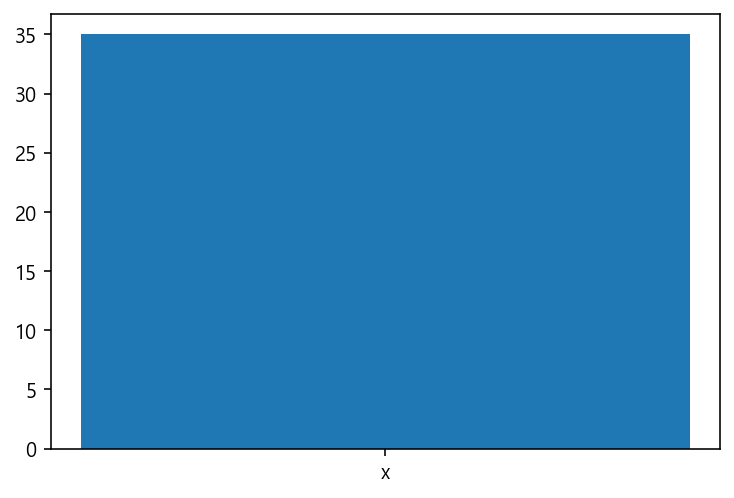

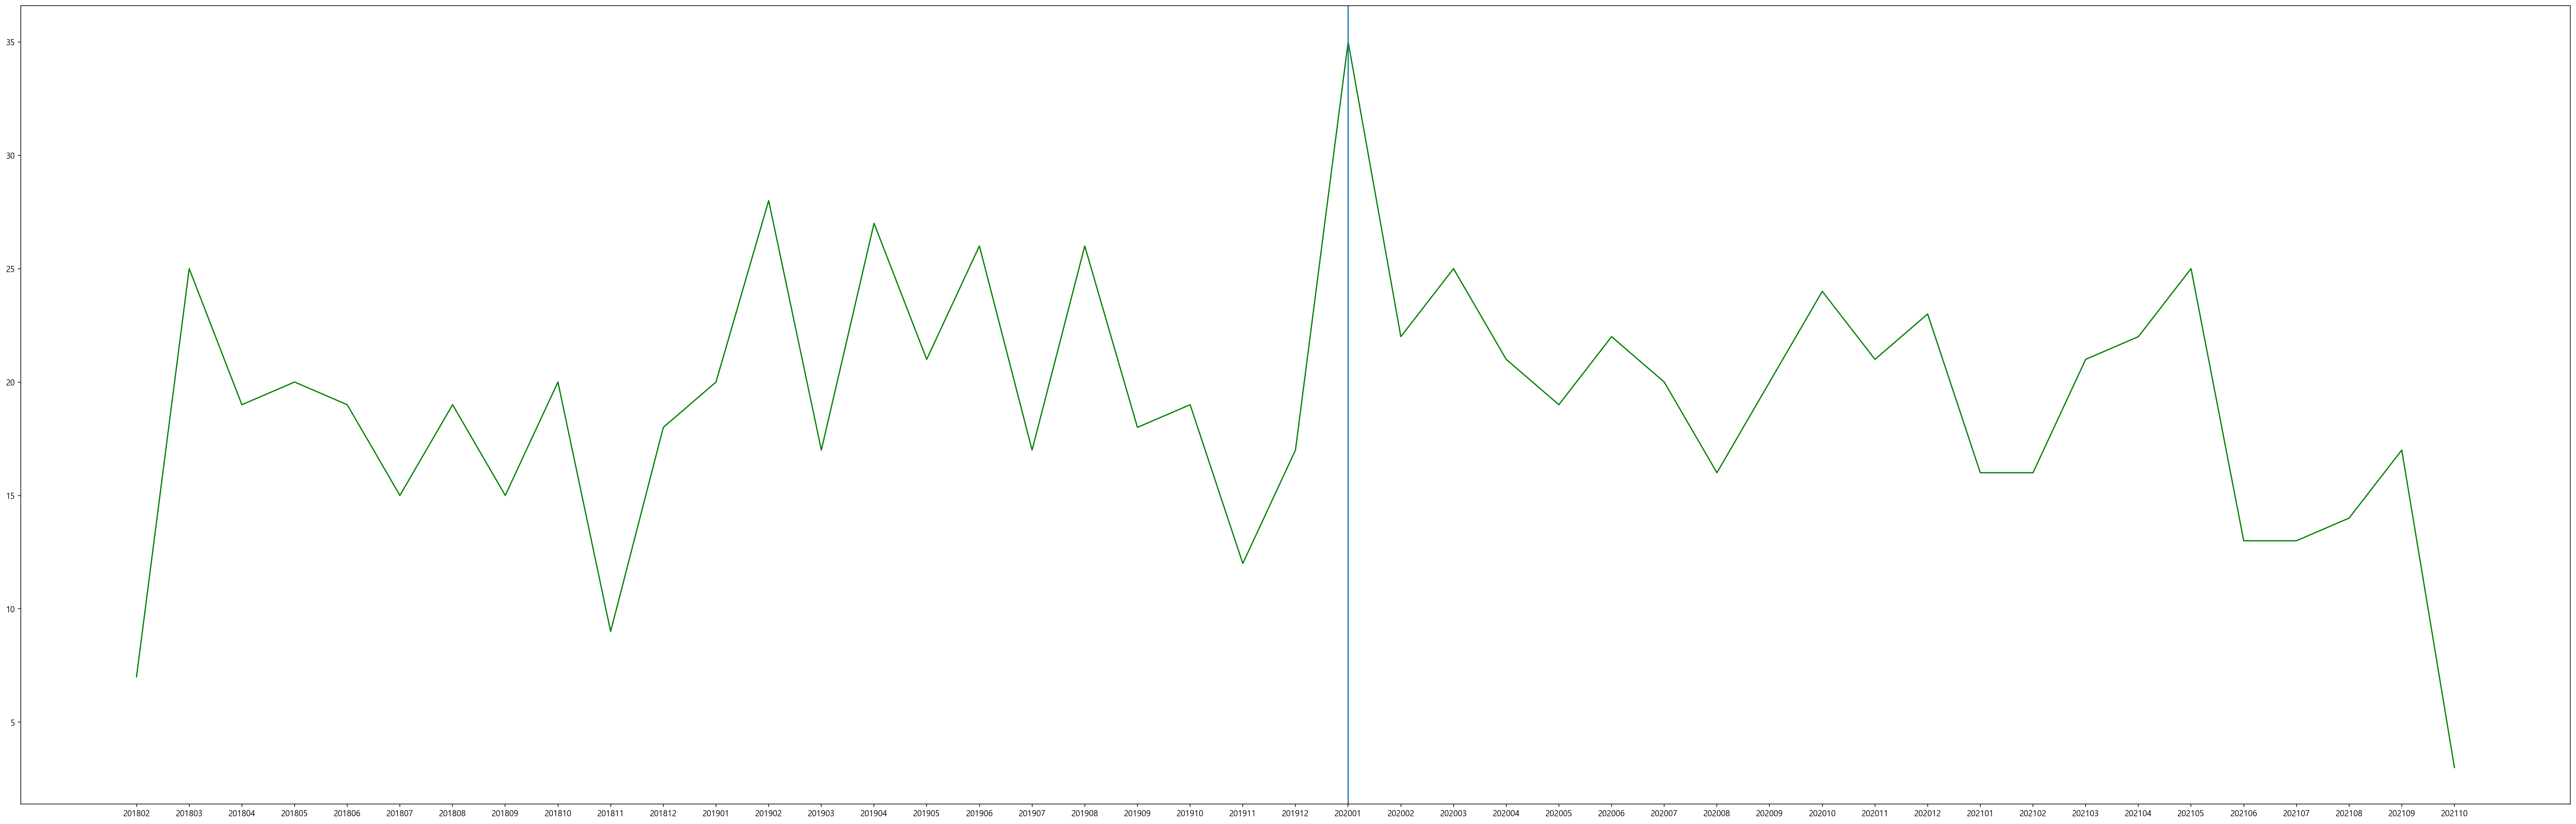

In [ ]:
# 기간별 강남구의 경양식 폐업건수
plt.figure(figsize = (56, 18))

plt.plot(y_m, closed_group['경양식']['강남구'], 'g')
plt.axvline(x='202001')


In [ ]:
# 폐업연월에 따른 지역별 총 폐업건수
closed_group_region = closed.groupby(['폐업연월', '지역(구)'])['사업장명'].count().unstack().fillna(0)
closed_group_region

# (기간별 폐업점포수 / 기간별 배달건수)를 지역구마다 구하면 유의미한 결과를 얻을 수 있을 것 같음
# -> 아직 데이터가 없음

지역(구),강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
폐업연월,,,,,,,,,,,,,,,,,,,,,
201802,24,6,5,8,20,12,12,11,4,6,...,12,12,21,7,13,6,5,10,18,5
201803,111,37,22,32,32,31,36,21,46,20,...,28,22,68,27,39,36,25,30,43,42
201804,91,39,25,54,54,46,28,28,29,23,...,18,35,66,31,56,36,28,41,35,25
201805,100,49,28,38,49,48,39,32,17,16,...,30,27,80,25,36,26,407,31,27,20
201806,105,39,25,48,34,34,25,30,27,19,...,19,26,67,26,49,42,34,22,34,29
201807,74,32,22,38,51,34,19,24,25,14,...,17,26,75,21,37,36,38,25,28,24
201808,95,50,21,38,31,41,30,22,20,14,...,21,35,43,30,34,32,40,32,32,26
201809,68,13,17,42,27,23,17,23,11,18,...,20,19,52,17,31,38,29,30,26,16
201810,93,47,36,42,42,25,49,20,27,25,...,32,24,61,55,53,20,27,66,37,25


In [ ]:
# 지역구별 폐업한 업종 수 그룹화
closed_group_categories = closed.groupby(['업태구분명', '지역(구)'])['지번주소'].count().unstack().fillna(0)
closed_group_categories

지역(구),강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
업태구분명,,,,,,,,,,,,,,,,,,,,,
감성주점,25.0,3.0,1.0,0.0,6.0,0.0,2.0,0.0,8.0,1.0,...,0.0,0.0,4.0,0.0,3.0,5.0,2.0,0.0,1.0,0.0
경양식,862.0,54.0,35.0,164.0,158.0,104.0,49.0,35.0,45.0,39.0,...,109.0,78.0,124.0,39.0,110.0,260.0,79.0,224.0,125.0,24.0
기타,697.0,173.0,207.0,70.0,98.0,130.0,155.0,78.0,160.0,52.0,...,170.0,246.0,683.0,224.0,228.0,422.0,237.0,237.0,184.0,83.0
기타 휴게음식점,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
김밥(도시락),54.0,11.0,8.0,4.0,13.0,15.0,5.0,3.0,4.0,8.0,...,9.0,10.0,14.0,10.0,14.0,7.0,3.0,3.0,8.0,2.0
까페,87.0,26.0,52.0,2.0,34.0,51.0,14.0,18.0,31.0,26.0,...,17.0,50.0,50.0,22.0,56.0,58.0,13.0,22.0,48.0,3.0
냉면집,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
다방,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
라이브카페,9.0,3.0,0.0,3.0,4.0,3.0,1.0,3.0,5.0,3.0,...,0.0,0.0,4.0,1.0,4.0,0.0,2.0,0.0,1.0,0.0


#### 2) 개업중인 상점 데이터 분석

In [ ]:
opening = df[df['상세영업상태명'] != '폐업']
opening = opening.drop(opening.columns[0:7], axis = 1)
opening = opening.drop(opening.columns[25:43], axis = 1)

In [ ]:
opening = opening.drop(columns = ['휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '도로명주소', '소재지우편번호', '도로명우편번호', '최종수정일자', '데이터갱신구분', '데이터갱신일자'], axis = 1)
opening

,상세영업상태명,폐업일자,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총인원
0,영업,NaN,NaN,서울특별시 종로구 신문로1가 166-2번지,일식동경,일식,NaN,NaN,일식,0.0,0.0,기타,우수,NaN,NaN
1,영업,NaN,NaN,서울특별시 종로구 관철동 5-12번지,상해,분식,198867.702591,451824.281126,분식,0.0,0.0,기타,기타,NaN,NaN
2,영업,NaN,55.71,서울특별시 관악구 신림동 1638-20번지,미쿠,일식,193687.348199,442284.164025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,영업,NaN,15.40,서울특별시 강남구 역삼동 603-4번지,강박사 쌈밥,한식,202557.373783,444807.337686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,영업,NaN,NaN,서울특별시 종로구 창신동 583-95번지 외1필지 (지상1층),짱구,분식,200883.062629,452530.632630,분식,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468914,영업,NaN,66.53,서울특별시 동작구 사당동 708-453,용범이네인계동껍데기 이수역점,한식,198233.078799,442658.447965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468915,영업,NaN,99.17,서울특별시 강남구 신사동 511-8 지상1층,하나비카레,한식,201780.928153,446229.467525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468917,영업,NaN,18.60,서울특별시 동작구 노량진동 85-37,고바우,한식,194932.503286,445598.274408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468919,영업,NaN,21.18,서울특별시 중구 장충동2가 76-2,진짜집,한식,200423.189208,451056.138976,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
opening = opening.drop(columns = ['폐업일자', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총인원'], axis = 1)
opening

,상세영업상태명,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y)
0,영업,NaN,서울특별시 종로구 신문로1가 166-2번지,일식동경,일식,NaN,NaN
1,영업,NaN,서울특별시 종로구 관철동 5-12번지,상해,분식,198867.702591,451824.281126
2,영업,55.71,서울특별시 관악구 신림동 1638-20번지,미쿠,일식,193687.348199,442284.164025
3,영업,15.40,서울특별시 강남구 역삼동 603-4번지,강박사 쌈밥,한식,202557.373783,444807.337686
4,영업,NaN,서울특별시 종로구 창신동 583-95번지 외1필지 (지상1층),짱구,분식,200883.062629,452530.632630
...,...,...,...,...,...,...,...
468914,영업,66.53,서울특별시 동작구 사당동 708-453,용범이네인계동껍데기 이수역점,한식,198233.078799,442658.447965
468915,영업,99.17,서울특별시 강남구 신사동 511-8 지상1층,하나비카레,한식,201780.928153,446229.467525
468917,영업,18.60,서울특별시 동작구 노량진동 85-37,고바우,한식,194932.503286,445598.274408
468919,영업,21.18,서울특별시 중구 장충동2가 76-2,진짜집,한식,200423.189208,451056.138976


In [ ]:
opening = opening.dropna(subset = ['지번주소'])
opening['지역(구)'] = opening['지번주소'].apply(goo)
opening

,상세영업상태명,소재지면적,지번주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),지역(구)
0,영업,NaN,서울특별시 종로구 신문로1가 166-2번지,일식동경,일식,NaN,NaN,종로구
1,영업,NaN,서울특별시 종로구 관철동 5-12번지,상해,분식,198867.702591,451824.281126,종로구
2,영업,55.71,서울특별시 관악구 신림동 1638-20번지,미쿠,일식,193687.348199,442284.164025,관악구
3,영업,15.40,서울특별시 강남구 역삼동 603-4번지,강박사 쌈밥,한식,202557.373783,444807.337686,강남구
4,영업,NaN,서울특별시 종로구 창신동 583-95번지 외1필지 (지상1층),짱구,분식,200883.062629,452530.632630,종로구
...,...,...,...,...,...,...,...,...
468914,영업,66.53,서울특별시 동작구 사당동 708-453,용범이네인계동껍데기 이수역점,한식,198233.078799,442658.447965,동작구
468915,영업,99.17,서울특별시 강남구 신사동 511-8 지상1층,하나비카레,한식,201780.928153,446229.467525,강남구
468917,영업,18.60,서울특별시 동작구 노량진동 85-37,고바우,한식,194932.503286,445598.274408,동작구
468919,영업,21.18,서울특별시 중구 장충동2가 76-2,진짜집,한식,200423.189208,451056.138976,중구


In [ ]:
opening_group = opening.groupby(['업태구분명','지역(구)'])['지번주소'].count().unstack().fillna(0)
opening_group
# 지역구별 현재 영업중인 업태 수 그룹화

지역(구),강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
업태구분명,,,,,,,,,,,,,,,,,,,,,
감성주점,54.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,63.0,1.0,...,1.0,3.0,16.0,7.0,8.0,7.0,0.0,11.0,22.0,1.0
경양식,2262.0,150.0,82.0,510.0,380.0,264.0,92.0,75.0,127.0,88.0,...,309.0,172.0,332.0,80.0,334.0,796.0,128.0,973.0,566.0,70.0
기타,1484.0,404.0,545.0,217.0,325.0,354.0,321.0,233.0,444.0,152.0,...,664.0,766.0,1635.0,582.0,669.0,1017.0,477.0,1233.0,745.0,337.0
김밥(도시락),99.0,20.0,12.0,30.0,18.0,49.0,14.0,4.0,17.0,18.0,...,17.0,39.0,38.0,17.0,26.0,25.0,6.0,17.0,25.0,3.0
까페,129.0,45.0,85.0,11.0,49.0,136.0,27.0,30.0,48.0,30.0,...,60.0,99.0,88.0,62.0,95.0,110.0,23.0,89.0,156.0,55.0
냉면집,4.0,12.0,3.0,2.0,3.0,0.0,2.0,1.0,2.0,0.0,...,1.0,2.0,5.0,0.0,3.0,3.0,4.0,0.0,2.0,5.0
도매업(유통),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
라이브카페,22.0,10.0,4.0,9.0,7.0,11.0,4.0,7.0,13.0,5.0,...,0.0,2.0,10.0,1.0,10.0,2.0,1.0,1.0,14.0,4.0
복어취급,4.0,0.0,1.0,4.0,0.0,0.0,5.0,0.0,2.0,0.0,...,0.0,1.0,3.0,2.0,3.0,2.0,0.0,1.0,1.0,1.0


In [ ]:
set(pd.unique(closed['업태구분명'])) - set(pd.unique(opening['업태구분명']))


{'기타 휴게음식점', '다방', '룸살롱', '식품등 수입판매업'}